## Analysis Of Ad-Hoc Communication Networks
by Datzael Gomez

### Let's begin:
Now I know I need not explain what the problem is since if you're reading this you more than likely know what we are supposed to do but I'll give a brief overview anyway. The essential goal is to try and organize a communications network composed of communication towers each with a different sized rectangular range within a spacial footprint. To do this each tower's range must adjust it's range to fall within the spacial footprint and also adjust itself to the alreading existing tower's ranges so there is no overlap between rectangular ranges preventing two or more towers from having "interference." So now let's start at the begining of how I will approach this.

#### Step 1 Let's make Rectangles:

So in order to even start this problem, a way to make rectangular communication regions for each communication towers needs to be established. The work flow will be dependent on how each rectangle is created in terms how to define a rectangle in python and how do I represent that in a function. Once that is decided I will have a way to randomly to create random rectangular regions.

### Making rectangles
The way I have defined how a communication towers region is represented was inspired by the library patches found in the module matplotlib. The function itself is named Rectangle and is called as follows patches.Rectangle(coordinates, width, height, color, transperancy of color, linewidth of borderlines). There is an example below. By using an origin, length and width a rectangle can be represented in matplotlib but rather than have a ton of graph that will take a lot of code to make I decided the best way to go about representing a rectangular region and the spacial footprint is by using matrices. Ill go into to more detail later but first the pressing matter is to be able to randomly generate rectangles.

## The Code Below needs to be run twice!!!

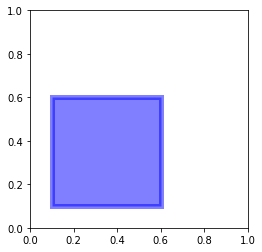

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')
'''
The code below plots a rectangle with an origin of (0.1,0.1), length=0.5 and width=0.5. (length/width cannot be 0)
It is to be noted that the length and width can be negative which I will make use of later on.
'''

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
ax1.add_patch(
    patches.Rectangle(
        (0.1, 0.1),   # (x,y)
        0.5,          # width
        0.5,          # height
        color='b',
        alpha=0.5,
        linewidth=5

    )
)


Using the idea of a rectangle having an origin, length and width I decided to use the random module in python to randomly generate the origin coordinates to plot a rectangle on the spacial footprint or in my case a my spacial matrix, along with the length and width of each rectanglular region. It is to be noted though that a length or width cannot be zero therefore the range of numbers can be selected by the command randint for the origin coordinate and length/width are different. Hence the range of numbers that can be selected for coordinates are 0 to n. On the other hand the range of numbers that can be selected as a length or width is 1 to n. Where lastly, the the spacial footprint is a n by n matrix. The plot below is the result of using the random module to generate my parameters presented by using matplotlib.


(0, 10)

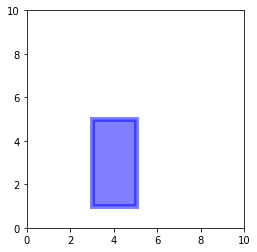

In [14]:
'''
@parameters: x_coor/y_coor(the origin coordinates required for plotting the a rectangle)
@parameters: lenghth(the length of output rectangle),width (the width of output rectangle)
This bit of code randomly generates the origin coordinates along with the length and 
width and then plots the resulting rectangular region
'''
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random as rnd
# I decided to make my spacial footprint n=5
x_coor=rnd.randint(0, 5)
y_coor=rnd.randint(0, 5)
length=rnd.randint(1, 5)
width=rnd.randint(1, 5)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, aspect='equal',)
ax2.add_patch(
    patches.Rectangle(
        (x_coor,y_coor),   # (x,y)
        width,          # width
        length,          # height
        color='b',
        alpha=0.5,
        linewidth=5

    )
)
ax2.set_xlim([0, 10])
ax2.set_ylim([0, 10])

Now the overall problem requires the use of multiple rectangular regions to be generated randomly therefore just to show that it is possible randomly generate more than 1 rectangle at once another matplotlib plot was used to present two randomly generated rectangular regions

(0, 10)

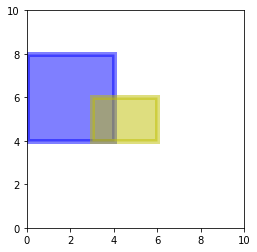

In [15]:
# make two rectangles now dun dun dun!!!
# this is when n=5

import random as rnd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import warnings
warnings.filterwarnings('ignore')

x_coor1=rnd.randint(0, 5)
y_coor1=rnd.randint(0, 5)
length1=rnd.randint(1, 5)
width1=rnd.randint(1, 5)

x_coor2=rnd.randint(0, 5)
y_coor2=rnd.randint(0, 5)
length2=rnd.randint(1, 5)
width2=rnd.randint(1, 5)

fig2 = plt.figure()
ax1 = fig2.add_subplot(111, aspect='equal',)
ax1.add_patch(
    patches.Rectangle(
        (x_coor1,y_coor1),   # (x,y)
        width1,          # width
        length1,          # height
        color='b',
        alpha=0.5,
        linewidth=5))
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 10])

ax2 = fig2.add_subplot(111, aspect='equal',)
ax2.add_patch(
    patches.Rectangle(
        (x_coor2,y_coor2),   # (x,y)
        width2,          # width
        length2,          # height
        color='y',
        alpha=0.5,
        linewidth=5))
ax2.set_xlim([0, 10])
ax2.set_ylim([0, 10])

### Let  the hard part commence:

So now that I know how to both plot and randomly generate rectangular regions for each communication tower for a n by n spacial footprint the problem now is how to deal with overlap. So the way I thought to tackle this is to make an n+1 by n+1 matrix and have each point in the matrix represent a point on the n by n spacial grid. The matrix is n+1 by n+1 of course because of python's zero indexing properties. By using 2 matrices I am able to both save area that has already been taken within a spacial footprint in one matrix and have another matrix to help with finding and trimming overlap between two tower regions.

Now the code below takes two rectangles (rectangle 1 and 2) that both overlap each other where both are of length and width 2 and trims down rectangle 2 according the greatest rectangular area within rectangle 2 that is not overlapping rectangle 1. This is done by first finding the corners of rectangle 2, then evaluating the rectangles that can be made by using these corners and then evaluating the area of each sub rectangle until the one with the greatest are is selected. After wards the new sub rectangle with the most area's parameters are saved and stored. 

Now the code below can be confusing even to me who wrote the darn thing but I included doc strings of what the overall code does. I did not include what all parameters in the doc strings because that alone would take me days so bear with me as I'll summarize the most important take aways of what the code does. The output will be three matrices one of when only rectangle 1 was in the spacial footprint, another of when rectangle 2 was incorporated in the spacial footprint and finally the last showing the trimmed sub rectangle of rectangle 2.

In [16]:
import numpy as np
'''
The code below creates a the parameters of rectangle 1 and 2 (origin coordinates, length, and width)
for this bit of code n = 5
'''
#rectangle 1
x_coor1=1
y_coor1=1
length1=2
width1=2
#rectangle 2
x_coor2=2
y_coor2=2
length2=2
width2=2

'''
The code below makes a 6 by 6 matrix called mem storing the location and area encompassed 
by rectangle 1 by putting 1's in the points that rectangle 1 encompasses and since it is 
the first rectangle to be stored there is no need to evaluate overlap.
A second matrix is then made called tmp that plots rectangle 2 adding a 1 at the points on the matrix where rectangle 2 
would be located.
'''
# saving rectangle 1 in a matrix
mem=np.zeros((6,6))
for i in range(length1):
    for j in range(width1):
        mem[x_coor1+j,y_coor1+i] += 1
# multiplying by 1 keeps the memory used for both matrices separate versus having both be the same matrix
tmp = mem*1
# by adding 1 to everything in rectangle 1 we will see that anything that is 2 in the matrix is overlap of the the two rectangles
for k in range(width2):
    for l in range(length2):
        tmp[x_coor2+k,y_coor2+l] += 1
print('Matrix with just rectangle 1')
print(mem)
print('Matrix with ovelap of rectangle 1 and 2')
print(tmp)
'''
The code below looks for where corners would occur in rectangle 2 by looking all points around each 1 in rectangle 2 
by looking for whether there are twos or 2's or 0's are located above, below, left or right and if requirements are 
met then the corner is saved in a list called corners. The requirements being the values in the tmp matrix being anything but the 
value 1 which would mean either overlap or empty space. 
'''
#these are the original corners of rectangle 2
corners=[[x_coor2,y_coor2],[x_coor2,y_coor2+length2-1],[x_coor2+width2-1,y_coor2+length2-1],[x_coor2+width2-1,y_coor2]]
for m in range(width2):
    for n in range(length2):
        if tmp[x_coor2+k,y_coor2+l] == 1:
            if not(tmp[x_coor2+k,y_coor2+l] == tmp[x_coor2+k,y_coor2+l-1]) or not(tmp[x_coor2+k,y_coor2+l] == tmp[x_coor2+k,y_coor2+l+1]) :
                corners.append([x_coor2+k,y_coor2+l])
            if not(tmp[x_coor2+k,y_coor2+l] == tmp[x_coor2+k-1,y_coor2+l]) or not(tmp[x_coor2+k,y_coor2+l] == tmp[x_coor2+k+1,y_coor2+l]) :
                corners.append([x_coor2+k,y_coor2+l])
                
'''
This bit of code looks for the greatest rectangular area within rectangle 2 but using each corner as a reference point and counting 
the possible length and width until out of bounds of rectangle 2 or until there is overlap. As a sanity check the code then review if
the calculated max area and check if there is any overlap if so the loop continues. The code saves the length and width of the rectangle
with the most area by means of testing all possible rectangle possibilties. A temporary variable saves the most recent rectangle with
greatest area and continues to update itself until the final rectangle is evaluated.
'''
# have to declare variables where _max are temporary varaibles and _max1 are saved values
length_max=0
width_max=0
area_max=0
length_max1=0
width_max1=0
area_max1=0
corner_max=0
corner_max1=0
# a for loop for to evaluate all rectangles created by corners
for i in range(len(corners)):
    inc1=0 
    inc2=0 
    inc3=0 
    inc4=0
    count1=0 
    count2=0 
    count3=0 
    count4=0
    #a series of while loops to evaluate the length and width all while maintaining the bounds of rectangle 2
    while tmp[corners[i][0]+inc1,corners[i][1]] == 1 and corners[i][0]<=x_coor2+width1-1:
        inc1 +=1
        count1+=1
        if count1> width_max:
            width_max= count1
    while tmp[corners[i][0]-inc2,corners[i][1]]== 1 and corners[i][0] >= x_coor2:
        inc2 +=1
        count2+=1
        if count2> np.abs(width_max):
            width_max= -count2
    while tmp[corners[i][0],corners[i][1]+inc3] == 1 and corners[i][1]<=y_coor2+length-1:
        inc3 +=1
        count3+=1
        if count3> width_max:
            length_max= count3
    while tmp[corners[i][0],corners[i][1]-inc4] == 1 and corners[i][1] >= y_coor2:
        inc4 +=1
        count4+=1
        if count4> np.abs(length_max):
            length_max= -count4
    # the temporary area is compared against the saved max area to check if the temporary area meets the conditions 
    #to update the saved max area 
    area_max=np.abs(length_max*width_max)
    if area_max>area_max1:
        corner_max=corners[i]
        tmp_var=0
        # the range cannot be negative and the way the code is set it is able to accept negative lengths and 
        # width that signifying the direction in which to move so np.abs is used 
        #to find absolute value of the length and width for setting up the for loops
        '''
This for loop is where the magic happens. The for loop sums all the values in the area of the sub rectangle thus if the speculated 
area (area_max) found by multiplication is not equal to the sum of all the values in the area which should be 1's then that means
there is some over lap in that area so the sub rectangle is not valid and will not be saved otherwise the rectangle will be saved
'''
        for j in range(np.abs(length_max)):
            for k in range(np.abs(width_max)):
                tmp_var += tmp[corner_max[0]+(np.abs(width_max)/width_max)*l,corner_max[1]+(np.abs(length_max)/length_max)*k]
        if (area_max == tmp_var):
            area_max1= area_max*1
            length_max1=length_max*1
            width_max1=width_max*1
            corner_max1= corner_max*1
        else: 
            area_max= area_max1*1
            length_max= length_max1*1
            width_max=width_max1*1
            corner_max= corner_max1*1
    else: 
        length_max= length_max1*1
        width_max=width_max1*1
        corner_max= corner_max1*1
        
'''
Lastly, the final chosen sub rectangle in rectangle 2 is saved into the matrix, 
where if I did this right will be a matrix of just 1's and 0's 
'''
for k in range(np.abs(length_max)):
    for l in range(np.abs(width_max)):
        mem[corner_max[0]+(np.abs(width_max)/width_max)*l,corner_max[1]+(np.abs(length_max)/length_max)*k] += 1
print('New matrix after trimming')
print(mem)

Matrix with just rectangle 1
[[0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
Matrix with ovelap of rectangle 1 and 2
[[0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 1. 2. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
New matrix after trimming
[[0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


Now after all that mess of code above I figured that I needed something easier on the eyes so I decided to break up the huge code into smaller functions for simplicity and then made it so the code can incorporate random rectangles so we could finally tackle the problem as a whole. So the cells below will shows all the functions that will be used. Before the attempt to complete the code entirely which I named lets_make_magic(). But before I get to ahead let's look at whats under the hood.

### My Functions 

The first function I created is called "begining_of(n)" the input for this is the spacial footprint size n. This functions purpose is solely to make the intial rectangular region for the first communitcation tower. It may be cheating in a sense but I found that setting this intial rectangle region at the origin helps with having atleast one rectangular region on the 0, x/y axis but it does not solve the problem of rectangular regions filling in the 0 axis.

The next function in question is the "rand_rect(n)" function this fucntion simply generates a random rectangle with the limits for the range of possible integer values selected for the length,width and origin point for the each communication tower rectangle

In [17]:
def begining_of(n):
    '''
    this sets up the spacial footprint for the communication towers by setting a communication tower at the origin and 
    returning mem (allocated memory matrix) and tmp( mutable matrix for calculations)
    '''
    import random as rnd
    length1=rnd.randint(1, n)
    width1=rnd.randint(1, n)
    mem=np.zeros((n+1,n+1))
    for i in range(length1):
        for j in range(width1):
            mem[0+j,0+i] += 1
    # multiplying by 1 keeps the memory used for both matrices separate avoiding kernel confusion by having 
    # both matrices be the same matrix
    return mem


def random_rect(n):
    '''
    This function creates a random rectangle by returning the origin, length and width of the rectangle
    '''
    #dimensions of rectangular region
    import random as rnd
    length=rnd.randint(1, n)
    width=rnd.randint(1, n)
    #origin of rectangle
    x_coor=rnd.randint(0, n)
    y_coor=rnd.randint(0, n)
    # check if rectangle is out of bounds since there are no negative number all we have to be worried is being greater than n
    if x_coor+width > n:
        x_coor, y_coor, length, width = random_rect(n)
    
    if y_coor+length> n:
        x_coor, y_coor, length, width = random_rect(n) 
    return x_coor, y_coor, length, width




The next 4 function are the bread and butter of my solution. "make_tmp()" that will use three of the four functions below within itself to output whether or not another rectangular region can be added into the spacial footprint. In other words it takes in a memory matrixrepresenting all the space within the spacial footprint where a 1 is area that is occupied by an already existing communication tower and a 0 represents available space in a footprint. It then generates a random rectangular region and adds 1 where the newly generated rectangle region area would which is then evaluated for overlap by lloking for 2's in the matrix representing where the new rectangle overlapped the previos rectangle. Then all possible corners are saved into a list where they are then they are used to look for all possible non overlappin rectangular regions within the newly generated rectangle region that is overlapping with another existing rectangular region.

"Check_for_trim()" takes in the parameters of the newly generated rectangle and evaluates if its needed to be trimmed using a temporary matrix that presents overlap by values of 2's

"get_corners()" searches for all the possible corners by looking for changes in value by looking for any value other than 1 that is either to the above, below, to right or left of the values within the newly generated rectanglular region.

"ar_max()" Finds the maximum area of the of all possible recctangle within the generated rectanglular region. first it evaluates the area of the sub rectangle which I found by taking a corner and counting the number of 1's to the left, right, above and below of the corner point till the count reaches out of bound of the generated region or encounter overlap thus getting length and width. The function then evalutes if the sub region is overlapping in a way if not it saves the sub rectangular region and continues to compare until another region with a larger area is found that does not overlap or until there are no more corners to evaluate.

In [18]:
def make_tmp(mem,n,count):
    '''
    This function takes in the intial mem matrix containing all the area that's been occupied by a rectangle
    and then returns the original (mem), temporary matrix (tmp) with overlap and the new matrix (new_mem) after trimming. 
    In case there is no overlap the function will return only the original (mem) and temporary matrix (tmp) 
    where new matrix will = tmp (new_mem).
    '''
    tmp=mem*1
    x_coor2, y_coor2, length2, width2 = random_rect(n)
    for k in range(width2):
        for l in range(length2):
            tmp[x_coor2+k,y_coor2+l] += 1
    if check_for_trim(tmp,x_coor2, y_coor2, length2, width2) == 1:
        new_mem = tmp*1
    elif check_for_trim(tmp,x_coor2, y_coor2, length2, width2) == 0:
        corners = get_corners(tmp,x_coor2, y_coor2, length2, width2)
        width_max1, length_max1, corner_max1 = ar_max(tmp,x_coor2, y_coor2, length2, width2,corners)
        new_mem = new_tmp(mem, width_max1, length_max1, corner_max1)
    return mem, tmp, new_mem
        


def check_for_trim(tmp,x_coor2, y_coor2, length2, width2):
    '''
    This function checks if the new rectangle needs to be trimmed
    '''
    tmp_val=0
    for k in range(width2):
        for l in range(length2):
            if tmp[x_coor2+k,y_coor2+l] == 1:
                tmp_val += tmp[x_coor2+k,y_coor2+l]
    if length2*width2 == tmp_val:
        decision = 1
    else:
        decision = 0
    return  decision


def get_corners(tmp,x_coor2, y_coor2, length2, width2):
    '''
    This function finds the corners of all possible rectanglular regions within a rectangle that is overlapping another
    '''
    corners=[[x_coor2,y_coor2],[x_coor2,y_coor2+length2-1],[x_coor2+width2-1,y_coor2+length2-1],[x_coor2+width2-1,y_coor2]]
    for m in range(width2):
        for n in range(length2):
            if tmp[x_coor2+k,y_coor2+l] == 1:
                if not(tmp[x_coor2+k,y_coor2+l] == tmp[x_coor2+k,y_coor2+l-1]) or not(tmp[x_coor2+k,y_coor2+l] == tmp[x_coor2+k,y_coor2+l+1]) :
                    corners.append([x_coor2+k,y_coor2+l])
                if not(tmp[x_coor2+k,y_coor2+l] == tmp[x_coor2+k-1,y_coor2+l]) or not(tmp[x_coor2+k,y_coor2+l] == tmp[x_coor2+k+1,y_coor2+l]) :
                    corners.append([x_coor2+k,y_coor2+l])
    return corners


def ar_max(tmp,x_coor2, y_coor2, length2, width2, corners):
    '''
    this function finds the dimensions of the rectangular region that was trimmed from a bigger rectangle
    '''
    import numpy as np
    # have to declare variables where _max are temporary varaibles and _max1 are saved values
    length_max=0
    width_max=0
    area_max=0
    length_max1=0
    width_max1=0
    area_max1=0
    corner_max=0
    corner_max1=0
    # a for loop for to evaluate all rectangles created by corners
    for i in range(len(corners)):
        inc1=0 
        inc2=0 
        inc3=0 
        inc4=0
        count1=0 
        count2=0 
        count3=0 
        count4=0
        #a series of while loops to evaluate the length and width all while maintaining the bounds of rectangle 2
        #count right
        while tmp[corners[i][0]+inc1,corners[i][1]] == 1 and corners[i][0]<=x_coor2+width1-1:
            inc1 +=1
            count1+=1
            if count1> width_max:
                width_max= count1
        #count left
        while tmp[corners[i][0]-inc2,corners[i][1]]== 1 and corners[i][0] >= x_coor2:
            inc2 +=1
            count2+=1
            if count2> np.abs(width_max):
                width_max= -count2
        #count above
        while tmp[corners[i][0],corners[i][1]+inc3] == 1 and corners[i][1]<=y_coor2+length-1:
            inc3 +=1
            count3+=1
            if count3> width_max:
                length_max= count3
        #count below
        while tmp[corners[i][0],corners[i][1]-inc4] == 1 and corners[i][1] >= y_coor2:
            inc4 +=1
            count4+=1
            if count4> np.abs(length_max):
                length_max= -count4
        # the temporary area is compared against the saved max area to check if the temporary area meets the conditions 
        #to update the saved max area 
        area_max=np.abs(length_max*width_max)
        if area_max>area_max1:
            corner_max=corners[i]
            tmp_var=0
            # the range cannot be negative and the way the code is set it is able to accept negative lengths and 
            # width that signifying the direction in which to move so np.abs is used 
            #to find absolute value of the length and width for setting up the for loops
           
            for j in range(np.abs(length_max)):
                for k in range(np.abs(width_max)):
                    if corner_max[0]+(np.abs(width_max)/width_max)*l <11 and corner_max[1]+(np.abs(length_max)/length_max)*k < 11:
                        tmp_var += tmp[corner_max[0]+(np.abs(width_max)/width_max)*l,corner_max[1]+(np.abs(length_max)/length_max)*k]
                    else:
                        tmp_var += 0
            # checks if max area is completely composed of 1's
            if (area_max == tmp_var):
                area_max1= area_max*1
                length_max1=length_max*1
                width_max1=width_max*1
                corner_max1= corner_max*1
            # if not then the parameters of the previosly saved region remain the current max and the temporary variables
            # are returned to 0 to prevent parameters of regions that do not exist for the particular corner being evaluated 
            else: 
                area_max= area_max1*1
                length_max= length_max1*1
                width_max=width_max1*1
                corner_max= corner_max1*1
        else: 
            length_max= length_max1*1
            width_max=width_max1*1
            corner_max= corner_max1*1    
    # parameter of the non overlapping sub rectangular region
    return width_max1, length_max1, corner_max1
        


"New_tmp()" is a function that simply adds the area of the new rectangular region that was trimmed into the memory matrix

"Calculate_area" calculates the area of a matrix by summing up all the values within it

"plot_rect()" was originally a function that I was going to use to plot everything in matplotlib put as I soon realized it was hard and time consuming to do but I just kept the function saved for a rainy day. 

In [19]:
def new_tmp(mem, width_max1, length_max1, corner_max1):
    '''
    this function makes the new matrix after trimming so there  is now a record of area that is occupied within the spacial footprint
    '''
    import numpy as np
    for k in range(np.abs(length_max)):
        for l in range(np.abs(width_max)):
            if mem[corner_max[0]+(np.abs(width_max)/width_max)*l,corner_max[1]+(np.abs(length_max)/length_max)*k]== 0:
                mem[corner_max[0]+(np.abs(width_max)/width_max)*l,corner_max[1]+(np.abs(length_max)/length_max)*k] += 1
    return mem

def calculate_area(new_mem,n):
    area=0
    for i in range(n):
        for j in range(n):
            area += new_mem[0+j,0+i]
    return area

def plot_rect(x_coor, y_coor, length, width, count, n):
    count= count%7
    colors= ['r','b','g','y','k','m','c']
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, aspect='equal',)
    ax2.add_patch(
        patches.Rectangle(
            (x_coor,y_coor),   # (x,y)
            width,          # width
            length,          # height
            color=colors[count],
            alpha=0.5,
            linewidth=5

        )
    )
    ax2.set_xlim([0, n])
    ax2.set_ylim([0, n])

So now that all the mintature functions are now written up I now have a way to have a spacial footprint size n and create an intial rectangle at the origin of the spacial footprint. From there, I can then randomly generate any rectangle within the confines of the footprint which is checked to see if it overlaps with a previous rectangular region as such that the if not the the memory matrix that records all the space within the foot print that has been taken is updated. Now if there is some overlap then a smaller sub rectangular regions within the overlapping rectangle are evaluated for the one with the biggest area that does not overlap any other region. Then from this the memory matrix is then updated to incorporate the smaller sub reactangle.

From here I need only plot the process of everything. Although when I think about I'm not to certain how well my code will hold up for large foot prints because originally when I first wrote it I based it my code around two 2X2 small rectangles where I didn't account for large area rectangles; howver, sure enough the code should atleat give a good proof of concept well in any case lets continue.

### Making the big loop

Below is my attempt to put everything together so that the user needs only have to input a spacial size nxn

In [20]:
def lets_make_magic(n):
    assert isinstance(n,int), 'must be of type int'
    '''
    This function takes in an integer n and creates a spacial footprint of dimensions nxn and then generates rectangular 
    regions as a new tower is added to the footprint should any new rectangular region overlap the already existing regions the 
    overlapping region will be trimmed to size. The outputs are a memory matrix representing how much of the footprint is 
    occupied by a communitcation tower region, the number of generated rectangles, and the number of towers in the footprint.  
    '''
    # simply declaring varibles
    total_area = n*n
    attempts = 0
    current_area = 0
    count=0
    count_s=0
    towers=0
    memory =begining_of(n)
    # continue until the entire area withint the footprint is taken up by tower regions
    while current_area < total_area:
        # evaluate the addition of another newly generated tower
        mem, temp, new = make_tmp(memory,n,count)
        #calculate the amount of area that is presently occuppied within the memory matrix
        current_area = calculate_area(new,n)
        # check to see if there are any changes to the memory matrix
        count = calculate_area(new,n)
        # if the area of the memory matrix has increased then that means a new tower was successfully added
        if count>count_s:
            # save the new area
            count_s = count*1
            # increment the number of towers that successfully generated a region
            towers += 1
            # show the overlap that there was
            print('Matrix with overlap')
            print(temp)
            # show the trimming and new matrix
            print('Matrix after Trimming')
            print(new)
        attempts += 1
        memory= new*1
    
    return memory,attempts,towers

In [21]:
'''
Here i am simply showing what happens when the code is runned. The bottom row and right column are always gonna be zero 
since I made the matrix one index bigger to help with indexing errors. The two values beside the outputted matrix represent
number of generated rectangles and the number of towers.
'''
lets_make_magic(10)

Matrix with overlap
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Matrix after Trimming
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Matrix with overlap
[[1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
 [1. 0. 0. 1. 1. 2. 2. 2. 2. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]


Matrix with overlap
[[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Matrix after Trimming
[[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Matrix with overlap
[[1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.]


Matrix with overlap
[[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Matrix after Trimming
[[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.]
 [1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Matrix with overlap
[[1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.]


Matrix with overlap
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Matrix after Trimming
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Matrix with overlap
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]


(array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 6725, 40)

Alright if you made it this far good news we're almost done. Now that I can create and fill any square rectangular region I can finally look at:
- the resulting coverage when given a coverage(area number) and number of towers?
- are there any gaps in my coverage?
- on average how many communication towers are required for full coverage?

The function above will be modified to answer these questions

In [22]:
# slight modification by removing the print statements now lets begin
def lets_make_magic1(n,coverage,towers):
    '''
    This function is a modification of lets_make_magic() it does the same thing but has restrictions of coverage area and tower 
    number
    '''
    # simply declaring varibles
    total_area = coverage
    attempts = 0
    current_area = 0
    count=0
    count_s=0
    tower1=0
    memory =begining_of(n)
    # continue until the a selected coverage area within the footprint is taken up or tower number limit is reached
    while current_area < total_area:
        # evaluate the addition of another newly generated tower
        mem, temp, new = make_tmp(memory,n,count)
        #calculate the amount of area that is presently occuppied within the memory matrix
        current_area = calculate_area(new,n)
        # check to see if there are any changes to the memory matrix
        count = calculate_area(new,n)
        # if the area of the memory matrix has increased then that means a new tower was successfully added
        if count>count_s:
            # save the new area
            count_s = count*1
            # increment the number of towers that successfully generated a region
            tower1 += 1         
        attempts += 1
        memory= new*1
    
    return tower1

In [23]:
def coverage_towers(n, coverage, towers):
    assert isinstance(n,int), 'must be of type int'
    import numpy as np
    '''
    Similar to lets_make_magic1() this function serves as a way to answer how much coverage, coverage gap area, and average tower
    number
    '''
    # simply declaring varibles
    total_area = coverage
    attempts = 0
    current_area = 0
    count=0
    count_s=0
    tower1=0
    memory =begining_of(n)
    # continue until the a selected coverage area within the footprint is taken up or tower number limit is reached
    while current_area < total_area and tower1 < towers:
        # evaluate the addition of another newly generated tower
        mem, temp, new = make_tmp(memory,n,count)
        #calculate the amount of area that is presently occuppied within the memory matrix
        current_area = calculate_area(new,n)
        # check to see if there are any changes to the memory matrix
        count = calculate_area(new,n)
        # if the area of the memory matrix has increased then that means a new tower was successfully added
        if count>count_s:
            # save the new area
            count_s = count*1
            # increment the number of towers that successfully generated a region
            tower1 += 1
            
        attempts += 1
        memory= new*1
    #calculate coverage as a percent
    cov=count_s/coverage*100
    #calculate how much area gap there is
    gaps= coverage- count_s
    #average full coverage tower number
    towers_l=[]
    #find the average of 5 attempts to get full coverge
    for i in range(5):
        towers1 = lets_make_magic1(n,coverage,towers)
        towers_l.append(towers1)
    aver = sum(towers_l)/len(towers_l)
    
    print('Current Coverage:')
    print(cov )
    print('How much are gap area is there?:')
    print(gaps)
    print('Average tower number for full coverge')
    print(aver)

In [24]:
coverage_towers(10, 80, 10)

Current Coverage:
100.0
How much are gap area is there?:
0.0
Average tower number for full coverge
14


By tweaking my lets_make_magic() command I was able to make a function coverage_towers that will help a user see the percentage of how much coverage the function was able to provide given the restrictions of tower number, area coverage and footprint size. The function will find the percentage of how much of the desired coverage is filled by dividing the amount of desired coverage area by the amount of coverge area there is. Then the function will output how much gap area there is by subtracting the amount of desired coverage area by the amount of coverge provided this number can be either positive or negative. If negative it simply mean how much excesse area there is. Lastly, the average tower number for full coverge is obtained by calculating how many towers it takes to get full coverge 5 times using the let_make_magic1() function. 

### Limitations:

I hate to say it but my code is not perfect in the slightest. First and formost the code cannot calculate anything but an n by n spacial footprint region. There is so many functions that are used that errors are infamous. The way rectangles are trimmed can use some work as I made an emergency debug to get it to work but when considering rectangular areas within a rectangle the best way to do it would be to use more than one corner to evaluate area. In the future I would like to sue matplotlib to make the notebook pop out more and make it more visually appeasing rather than showing simple matrices as my graphs. But more importantly the calculation time for the code as a whole is plentiful and rigorous to the degree that it's almost unpratical for real life use. Howver the code in itself is able to do what it set out to do which is present coverge percentage, amount of gap area, and average tower number for full coverage so that any user could use this code to find the answer to these three problems. Nonetheless this is my approach and thank you for reading.